<a href="https://colab.research.google.com/github/leadeev/Numpy/blob/main/4_3_Python_Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall

**Below is an example of an implementation of the Monty Hall game using native Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

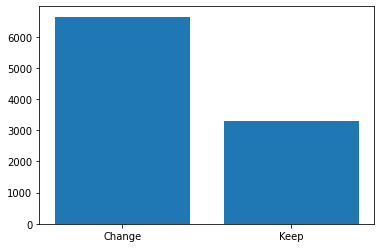

In [ ]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):

  doors = ['A', 'B', 'C']
  correct_door = choice(doors)
  
  first_choice = choice(doors)
  doors.remove(first_choice)

  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  else:
      raise ValueError("Strategy not recognized!")
  
  return second_choice == correct_door


def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))


plot = plt.bar([1, 2],
               [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000))], 
               tick_label=["Change", "Keep"])

# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar, corresponding to a new strategy called **Alternate**. 

A player following it will alternate **randomly** between "Change" and "Keep".


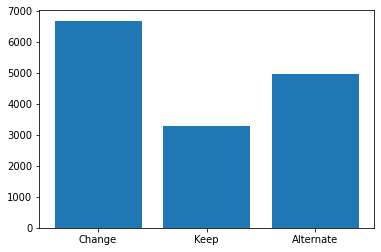

In [1]:
import matplotlib.pyplot as plt
from random import choice

def play_one_game(strategy):

  doors = ['A', 'B', 'C']
  correct_door = choice(doors)
  
  first_choice = choice(doors)
  doors.remove(first_choice)

  while True:
    hint_door = choice(doors)
    if hint_door != correct_door:
      doors.remove(hint_door)
      break

  if strategy.lower() == "change":
      second_choice = choice(doors)
  elif strategy.lower() == "keep":
      second_choice = first_choice
  elif strategy.lower() == "alternate":
        # Randomly choose between "Change" and "Keep"
        strategy = choice(["Change", "Keep"])
        if strategy == "Change":
            second_choice = choice(doors)
        else:
            second_choice = first_choice
  else:
      raise ValueError("Strategy not recognized!")
  
  return second_choice == correct_door


def play_many_games(strategy, nb_turns):
    return list(1 if play_one_game(strategy) else 0 for i in range(nb_turns))


plt.bar([1, 2, 3], [sum(play_many_games("change", 10000)), sum(play_many_games("keep", 10000)), sum(play_many_games("alternate", 10000))], 
               tick_label=["Change", "Keep", "Alternate"])
plt.show()

# Mission 3

Now, re-code the Monty Hall game using NumPy. **Do not use Python lists, the built-in `random` module, or any for or while loops in the code**. NumPy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, `play_one_game` and `play_many_games`. In other words, **your NumPy program should now contain only one function**. Obviously, **the visual should be the same as in mission 2**.

In [ ]:
import numpy as np

def play_monty_hall(strategy, nb_turns):
    # Set the seed for reproducibility
    np.random.seed(0)
    # Generate an array of the correct door for each turn
    correct_doors = np.random.randint(0, 3, nb_turns)
    # Generate an array of the player's first choice for each turn
    first_choices = np.random.randint(0, 3, nb_turns)
    # Generate an array of the hint door for each turn
    hint_doors = np.random.randint(0, 3, nb_turns)
    # Make sure the hint door is not the correct door
    hint_doors = np.where(hint_doors == correct_doors, (hint_doors + 1) % 3, hint_doors)
    if strategy.lower() == "change":
        # Remove the hint door and first choice from the available doors
        used_doors = set(np.concatenate((first_choices, hint_doors)))
        remaining_doors = [x for x in range(3) if x not in used_doors]
        if len(remaining_doors) > 0:
            second_choices = np.random.choice(remaining_doors, nb_turns)
        else:
            second_choices = np.random.randint(0, 3, nb_turns)
    elif strategy.lower() == "keep":
        second_choices = first_choices
    elif strategy.lower() == "alternate":
        # Randomly choose between "Change" and "Keep"
        strategy = np.random.randint(0, 2, nb_turns)
        used_doors = set(np.concatenate((first_choices, hint_doors)))
        remaining_doors = [x for x in range(3) if x not in used_doors]
        if len(remaining_doors) > 0:
            second_choices = np.where(strategy == 0, first_choices, np.random.choice(remaining_doors, nb_turns))
        else:
            second_choices = np.random.randint(0, 3, nb_turns)
    else:
        raise ValueError("Strategy not recognized!")
    # Count the number of correct second choices
    correct_choices = np.sum(second_choices == correct_doors)
    # Calculate the win rate
    win_rate = correct_choices / nb_turns
    return win_rate
plt.bar([1, 2, 3],
        [play_monty_hall("change", 10000), 
        play_monty_hall("keep", 10000),
        play_monty_hall("alternate", 10000)],
        tick_label=["Change", "Keep", "Alternate"])
plt.ylim(0,1)
plt.xlabel("Strategy")
plt.ylabel("Win Rate")
plt.title("Monty Hall Game")
plt.show()
